In [ ]:
%load_ext autoreload
%autoreload 2

import numpy as np
# 导入数据集
from torch.utils.data import DataLoader

from utils.dataset import ERA5SstDataset

data_set = ERA5SstDataset(width=15, step=5, offset=4400, lon=[60, 80], lat=[160, 180])

train_dataloader = DataLoader(data_set, batch_size=20, shuffle=False)


In [43]:
data_enumerate = enumerate(train_dataloader)

print(data_set.getTime(10))
print(len(data_set))

('2000-05-15', '2000-05-30')
1794


In [40]:
loader_itr = iter(train_dataloader)

x_train, y_train = next(loader_itr)
x_test, y_test = next(loader_itr)

from torch import unsqueeze, mean, min, max
from keras import optimizers, utils

from models.model import ssim_loss

# 增加通道维度
x_train = unsqueeze(x_train, dim=-1)
y_train = unsqueeze(y_train, dim=-1)
x_test = unsqueeze(x_test, dim=-1)
y_test = unsqueeze(y_test, dim=-1)

from models.LSTM import Conv2DLSTMNetwork

model = Conv2DLSTMNetwork(shape=x_train.shape)

model.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss=ssim_loss)

model.summary()
model.build(input_shape=x_train.shape)
utils.plot_model(model, show_shapes=True)

Get data from 4500
Time: 2001-08-08 - 2001-08-23
Get data from 4501
Time: 2001-08-13 - 2001-08-28
Get data from 4502
Time: 2001-08-18 - 2001-09-02
Get data from 4503
Time: 2001-08-23 - 2001-09-07
Get data from 4504
Time: 2001-08-28 - 2001-09-12
Get data from 4505
Time: 2001-09-02 - 2001-09-17
Get data from 4506
Time: 2001-09-07 - 2001-09-22
Get data from 4507
Time: 2001-09-12 - 2001-09-27
Get data from 4508
Time: 2001-09-17 - 2001-10-02
Get data from 4509
Time: 2001-09-22 - 2001-10-07
Get data from 4510
Time: 2001-09-27 - 2001-10-12
Get data from 4511
Time: 2001-10-02 - 2001-10-17
Get data from 4512
Time: 2001-10-07 - 2001-10-22
Get data from 4513
Time: 2001-10-12 - 2001-10-27
Get data from 4514
Time: 2001-10-17 - 2001-11-01
Get data from 4515
Time: 2001-10-22 - 2001-11-06
Get data from 4516
Time: 2001-10-27 - 2001-11-11
Get data from 4517
Time: 2001-11-01 - 2001-11-16
Get data from 4518
Time: 2001-11-06 - 2001-11-21
Get data from 4519
Time: 2001-11-11 - 2001-11-26
Get data from 4520
T

Model: "conv2dlstm_network_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_8 (Sequential)       │ (20, 80, 80, 1)        │     2,875,457 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,875,457 (10.97 MB)

 Trainable params: 2,875,329 (10.97 MB)

 Non-trainable params: 128 (512.00 B)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [11]:
# 训练模型
from keras.api.callbacks import ReduceLROnPlateau, EarlyStopping

# 动态调整学习率
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1e-5)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(x_train, y_train, batch_size=5, epochs=50, validation_data=(x_test, y_test), callbacks=[reduce_lr, early_stopping])

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 40s 9s/step - loss: 0.9895 - val_loss: 0.9627 - learning_rate: 0.0010
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 34s 9s/step - loss: 0.9693 - val_loss: 0.9176 - learning_rate: 0.0010
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 36s 10s/step - loss: 0.9146 - val_loss: 0.9103 - learning_rate: 0.0010
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 34s 9s/step - loss: 0.9087 - val_loss: 0.8635 - learning_rate: 0.0010
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 35s 9s/step - loss: 0.7985 - val_loss: 0.7170 - learning_rate: 0.0010
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 34s 9s/step - loss: 0.6202 - val_loss: 0.6915 - learning_rate: 0.0010
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 33s 9s/step - loss: 0.5522 - val_loss: 0.6910 - learning_rate: 0.0010
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 35s 9s/step - loss: 0.4710 - val_loss: nan - learning_rate: 0.0010
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 34s 9s/step - loss: 0.4493 - val_loss: 0.6548 - learning_rate: 0.0010
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 35s 9s/step

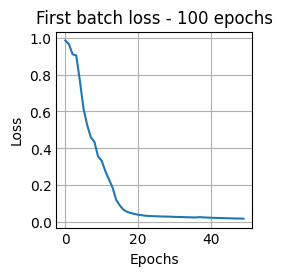

In [12]:
# 损失函数曲线

import matplotlib.pyplot as plt

plt.title("First batch loss - 100 epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(history.history['loss'], label='train')


In [13]:
# 使用下一批数据进行迭代
from config.params import MODEL_SAVE_PATH

n = 1
history_all = []
history_t = []


while True:
    try:
        print(f"Batch {n}/{len(data_set)} ---------------------------------\n")
        x_train, y_train = next(loader_itr)
        x_test, y_test = next(loader_itr)

        x_train = unsqueeze(x_train, dim=-1)
        y_train = unsqueeze(y_train, dim=-1)
        x_test = unsqueeze(x_test, dim=-1)
        y_test = unsqueeze(y_test, dim=-1)

        model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss=ssim_loss)
        history_t = model.fit(x_train, y_train, batch_size=10, epochs=5, validation_data=(x_test, y_test), callbacks=[reduce_lr, early_stopping])
        history_all.append(history_t)

        # 更新模型
        print("Current model loss: ", history_t.history['loss'][-1])
        if history_t.history['loss'][-1] != np.inf \
            and history_t.history['loss'][-1] != -np.inf \
            and history_t.history['loss'][-1] != 1.0:
            print("Update model...")
            model.save(MODEL_SAVE_PATH + '/Conv2DLSTMNetwork.keras')
        n += 1
    except StopIteration:
        break


Batch 1/6194 ---------------------------------

Get data from 40
Get data from 200 to 215
Time: 1940-07-19 18:00:00 - 1940-08-03 18:00:00
Get data from 41
Get data from 205 to 220
Time: 1940-07-24 18:00:00 - 1940-08-08 18:00:00
Get data from 42
Get data from 210 to 225
Time: 1940-07-29 18:00:00 - 1940-08-13 18:00:00
Get data from 43
Get data from 215 to 230
Time: 1940-08-03 18:00:00 - 1940-08-18 18:00:00
Get data from 44
Get data from 220 to 235
Time: 1940-08-08 18:00:00 - 1940-08-23 18:00:00
Get data from 45
Get data from 225 to 240
Time: 1940-08-13 18:00:00 - 1940-08-28 18:00:00
Get data from 46
Get data from 230 to 245
Time: 1940-08-18 18:00:00 - 1940-09-02 18:00:00
Get data from 47
Get data from 235 to 250
Time: 1940-08-23 18:00:00 - 1940-09-07 18:00:00
Get data from 48
Get data from 240 to 255
Time: 1940-08-28 18:00:00 - 1940-09-12 18:00:00
Get data from 49
Get data from 245 to 260
Time: 1940-09-02 18:00:00 - 1940-09-17 18:00:00
Get data from 50
Get data from 250 to 265
Time: 1940

242


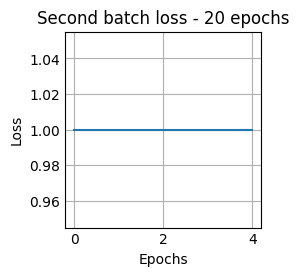

In [14]:
# 损失函数曲线

import matplotlib.pyplot as plt

plt.title("Second batch loss - 20 epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(history_t.history['loss'], label='train')

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - loss: 1.0000
1.0
(80, 80)
torch.Size([80, 80])
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[26.492584 26.43692  26.367584 ... 25.132233 25.065826 25.028717]
 [26.617584 26.648834 26.55899  ... 25.324615 25.239655 25.202545]
 [26.697662 26.74649  26.736725 ... 25.516022 25.43106  25.438873]
 ...
 [29.81192  29.906647 29.944733 ... 29.3461   29.301178 29.332428]
 [29.838287 29.90567  29.940826 ... 29.404694 29.356842 29.410553]
 [29.741608 29.799225 29.834381 ... 29.491608 29.438873 29.36856 ]]
RMSE:  805.34607


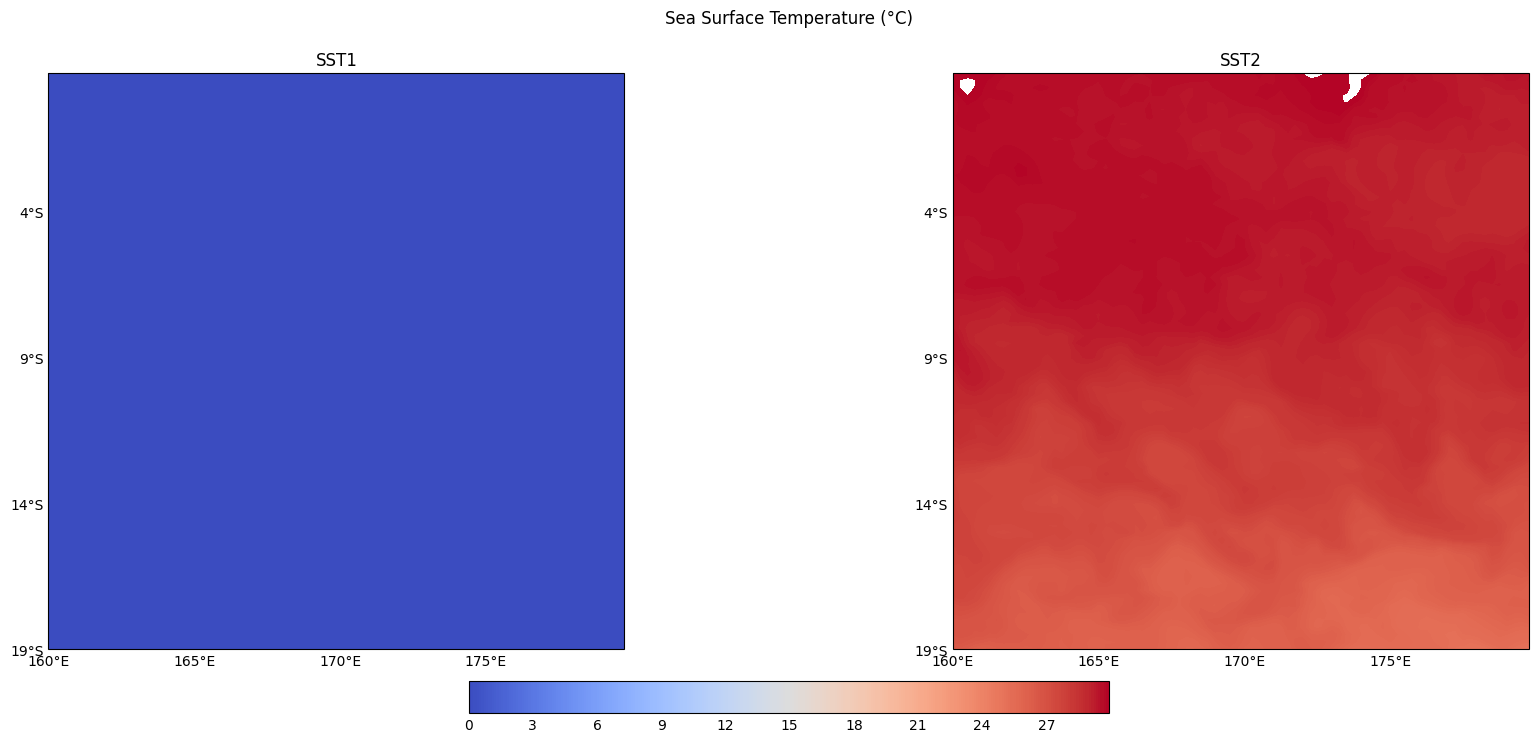

(<Figure size 2000x800 with 3 Axes>,
 (<GeoAxes: title={'center': 'SST1'}>, <GeoAxes: title={'center': 'SST2'}>))

In [15]:
# 预测
from utils.plot import plot_sst_distribution_compare # 导入绘图函数，绘制SST分布的比较图
from models.model import ssim_loss # 导入自定义的SSIM损失函数，模型训练时计算损失

from keras.src.saving import load_model  # 从Keras中导入加载模型的函数

saved_model = load_model(MODEL_SAVE_PATH + '/Conv2DLSTMNetwork.keras', custom_objects={'ssim_loss': ssim_loss, 'Conv2DLSTMNetwork': Conv2DLSTMNetwork})

y_pred = model.predict(x_test) # 使用模型进行预测

print(model.evaluate(x_test,y_test)) # x_test测试数据

print(y_pred[5, :, :, 0].shape)  # 打印第15个样本的预测结果的形状
print(y_test[5, :, :, 0].shape)

y = y_pred[5, :, :, 0]
g = y_test[5, :, :, 0].numpy()

print(y)
print(g)

# 计算RMSE
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y, g)

print("RMSE: ", rmse)

plot_sst_distribution_compare(y, g)